<a href="https://colab.research.google.com/github/AhmadAlabrash/Self-Driving/blob/main/Calibrate_%26_Unsdistort_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [224]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [225]:
x =7
y =7

In [226]:
image = cv2.imread('/content/1.png')

In [227]:
gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)

In [228]:
retrive , corners = cv2.findChessboardCorners(gray , (x,y), flags=cv2.CALIB_USE_INTRINSIC_GUESS)

In [229]:
print(retrive)

True


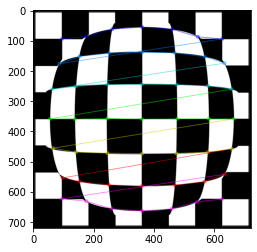

In [230]:
cv2.drawChessboardCorners(image , (x,y),corners,retrive)
plt.imshow(image)

In [231]:
obj = np.zeros(((x*y),3),np.float32)
obj[:,:2] = np.mgrid[0:x,0:y].T.reshape(-1,2)

imgpoints = []
ob = []

imgpoints.append(corners)
ob.append(obj)

In [232]:
ret, mtx, dist, rvecs, tvecs =cv2.calibrateCamera(ob, imgpoints ,gray.shape[::-1],None,None )

In [233]:
undistort_image =cv2.undistort(image ,mtx ,dist ,None ,mtx)

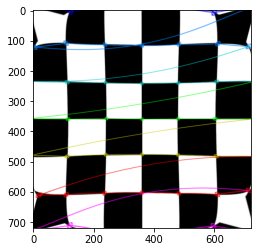

In [234]:
plt.imshow(undistort_image)